# Финальный проект

## Шаг 1

Для начала импортируем необходимые для работы модули

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import plotly.express as px
from dotenv import load_dotenv
import os



У нас есть два файла. Их необходимо прочитать и записать в переменные.

In [142]:
visits = pd.read_csv("visits_1k.csv")
registrations = pd.read_csv("regs_1k.csv")

Проверим, что все прочиталось верно.

In [143]:
visits.head()

,uuid,platform,user_agent,date
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T13:29:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T16:44:28
2,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-06T06:12:36
3,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T20:16:37
4,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-05T17:42:47


In [144]:
registrations.head()

,date,user_id,email,platform,registration_type
0,2023-03-01T00:25:39,8838849,joseph95@example.org,web,google
1,2023-03-01T14:53:01,8741065,janetsuarez@example.net,web,yandex
2,2023-03-01T14:27:36,1866654,robert67@example.org,web,google
3,2023-03-01T02:42:34,1577584,elam@example.net,web,apple
4,2023-03-01T10:27:14,4765395,stephanie68@example.net,web,yandex


На этом шаге, изучим общую информацию о датасетах.

In [145]:
visits.describe()

,uuid,platform,user_agent,date
count,1000,1000,1000,1000
unique,519,3,28,996
top,251a0926-ece3-4d77-aa42-ab569fdf9fe2,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T08:01:45
freq,4,954,71,2


## Шаг 2

Сделаем запрос по данным в реальном времени по API с 2023-03-01 по 2023-09-01.

Для начала подгрузим переменные окружения. Это необходимо для того, что бы не хардкодить их в ноутбуке и в случае необходимости, поменять их в одном файле.

In [146]:
load_dotenv(dotenv_path="var.env")

DATE_BEGIN = os.getenv("DATE_BEGIN")
DATE_END   = os.getenv("DATE_END")
API_URL    = os.getenv("API_URL")

print(DATE_BEGIN, DATE_END, API_URL)

2023-03-01 2023-09-01 https://data-charts-api.hexlet.app


Напишем функцию для получения Датафреймов по API

In [147]:
def fetch_df(endpoint: str, begin: str, end: str) -> pd.DataFrame:
    url = f"{API_URL}/{endpoint}"
    params = {"begin": begin, "end": end}
    r = req.get(url, params=params)
    df = pd.DataFrame(r.json())
    return df
    
    


ДатаФрейм визитов

In [148]:
df_visits = fetch_df("visits", DATE_BEGIN, DATE_END)
df_visits

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01T06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T10:26:13
3,19322fed-157c-49c6-b16e-2d5cabeb9592,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-01T12:33:06
4,04762a22-3c9f-40c9-9ac9-6628c4381836,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T01:38:35
...,...,...,...,...
263454,6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-08-29T10:43:29
263455,1d91535e-d984-4f76-bbaa-c14c0fd4f2e2,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-08-29T19:29:16
263456,f2496721-7126-430d-976e-777a6cdccb4f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-29T12:51:11
263457,f2496721-7126-430d-976e-777a6cdccb4f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-29T21:45:08


Датафрейм регистраций

In [149]:
df_regs = fetch_df("registrations", DATE_BEGIN, DATE_END)
df_regs

,datetime,user_id,email,platform,registration_type
0,2023-03-01T07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01T13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01T03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple
3,2023-03-01T00:04:47,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60,halldavid@example.org,web,email
4,2023-03-01T18:31:52,27f875fc-f8ce-4aeb-8722-0ecb283d0760,denise86@example.net,web,google
...,...,...,...,...,...
21831,2023-08-31T07:32:08,a94b4a28-f25c-433c-b4ef-85af7d5b0c11,ikelley@example.net,ios,apple
21832,2023-08-31T23:25:50,fc709c6b-528b-40d8-8980-c2c278e5a628,brittanycox@example.net,ios,apple
21833,2023-08-31T19:29:18,11e32805-7571-4108-8e50-e211d051bf7e,aryan@example.net,ios,apple
21834,2023-08-31T19:38:54,bce7b818-768b-434a-b6af-573cd60bff7f,emartinez@example.net,ios,email


# Шаг 3

Нам необходимо рассчитать конверсию из визита в регистрацию. В первую очередь необходимо отсеять SEO ботов из визитов. Для этого создадим булеву маски.

### Подготовка визитов 

В первую очередь необходимо отсеять SEO ботов из визитов. Для этого создадим булеву маски.

In [150]:
non_bot_mask = ~df_visits['user_agent'].str.contains('bot', case=False, na=False)

применяем маску к Датафрейму visits

In [151]:
visits_non_bot = df_visits[non_bot_mask].copy()


Приводим колонку Datetime, к необходимому типу. Изначально это object.

In [152]:
visits_non_bot["datetime"] = pd.to_datetime(visits_non_bot["datetime"], utc=True, errors="coerce")

Берём только последние визиты используя метод .dropduplicates

In [153]:
last_visits = (visits_non_bot.sort_values("datetime").drop_duplicates(subset="visit_id",keep="last"))

добавим столбец с только с днем, для оптимальной группировки данных по дню 

In [154]:
last_visits["date_group"] = last_visits["datetime"].dt.date

Подсчитываем количество визитов в день по 3 платформам 

In [155]:
visits_grouped = last_visits.groupby(["date_group", "platform"]).size().reset_index(name="visits")

### Подготовка регистраций

In [156]:
df_regs["datetime"] = pd.to_datetime(df_regs["datetime"], utc=True, errors="coerce")

In [157]:
df_regs["date_group"] = df_regs["datetime"].dt.date

In [158]:
regs_grouped = df_regs.groupby(["date_group", "platform"]).size().reset_index(name="registrations")

### Подготовка общего датафрейма

Объединим датафреймы по date_group, platform

In [159]:
conversion_df = visits_grouped.merge(regs_grouped, on=["date_group", "platform"],how="left")


Вычислим конверсию

In [160]:
conversion_df["conversion"] = ((conversion_df["registrations"] / conversion_df["visits"]) * 100).round(2)

Записываем Датафрейм в json файл 

In [161]:
conversion_df.to_json("./conversion.json")

## Шаг 4

В этом шаге добавим данные по рекламным кампаниям. На выходе получим датафрейм со следующими полями:

    date_group — дата
    visits — визиты в дату
    registrations — регистрации в дату
    cost — затраты на рекламу, 0 если не было затрат
    utm_campaign — название рекламной кампании, none если не было в этот период рекламы


В первую очередь необходимо, создать датафрейм из csv файла и привести колнку с датами к datetime. 

In [162]:
ads_df = pd.read_csv("./ads.csv")

In [163]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          159 non-null    object
 1   utm_source    159 non-null    object
 2   utm_medium    159 non-null    object
 3   utm_campaign  159 non-null    object
 4   cost          159 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


Обработаем таблицу

In [164]:
ads_df["date"] = pd.to_datetime(ads_df["date"], utc=True,errors="coerce")
ads_df["date_group"] = ads_df["date"].dt.date
ads_df = ads_df.groupby(["date_group", "utm_campaign"]).agg({"cost": "sum"}).reset_index()

Подготовим таблицу с визитами и регистрациями. Сделаем ее из датафрейма конверсий.

In [165]:
visits_and_regs = conversion_df.copy()
visits_and_regs = visits_and_regs.drop(["conversion",], axis=1)
agg_dict ={"visits": "sum", "registrations": "sum"}
visits_and_regs = visits_and_regs.groupby(["date_group"]).agg(agg_dict).reset_index()

Делаеам датафрейм по заданному условию

In [166]:
ads = pd.merge(visits_and_regs, 
                    ads_df,
                    how="left",
                    on="date_group")
ads["cost"] = ads["cost"].fillna(0)
ads.to_json("./ads.json")

## Шаг 4. Визуализация

### Итоговые визиты

In [167]:
total_visits = ads.groupby(["date_group"]).agg({"visits":"sum"}).reset_index()
date_limit = pd.to_datetime("2023-04-30")
total_visits["date_group"] = pd.to_datetime(total_visits["date_group"])
filtered_visits = total_visits[total_visits["date_group"] <= date_limit]

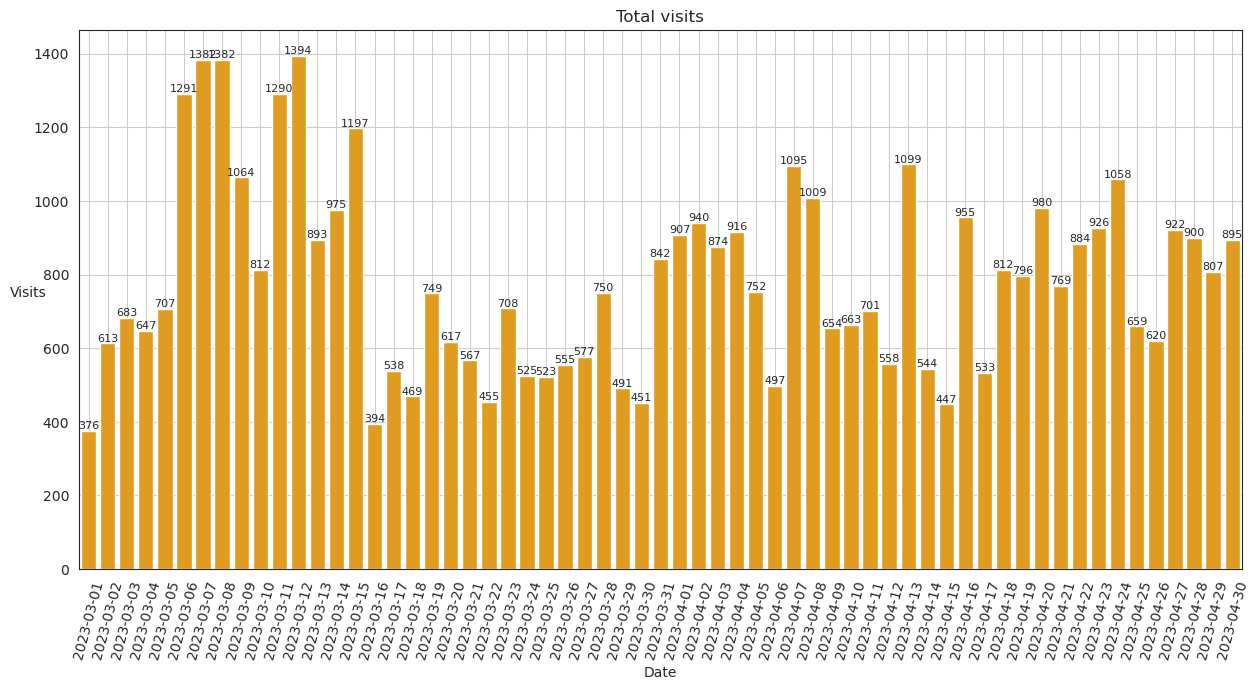

In [168]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x="date_group", y="visits", data=filtered_visits, color="orange")
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Visits", rotation=360)
plt.title("Total visits")
plt.grid()
plt.savefig("./charts/final_visits_barplot.png")
plt.show()


### Итоговые визиты с разбивкой по платформам: web, android, ios

In [169]:
visits_by_platform = conversion_df.groupby(["date_group", "platform" ]).agg({"visits":"sum"}).reset_index()
visits_by_platform["date_group"] = pd.to_datetime(visits_by_platform["date_group"])
filtered_visits_by_platform = visits_by_platform[visits_by_platform['date_group'] <= date_limit]

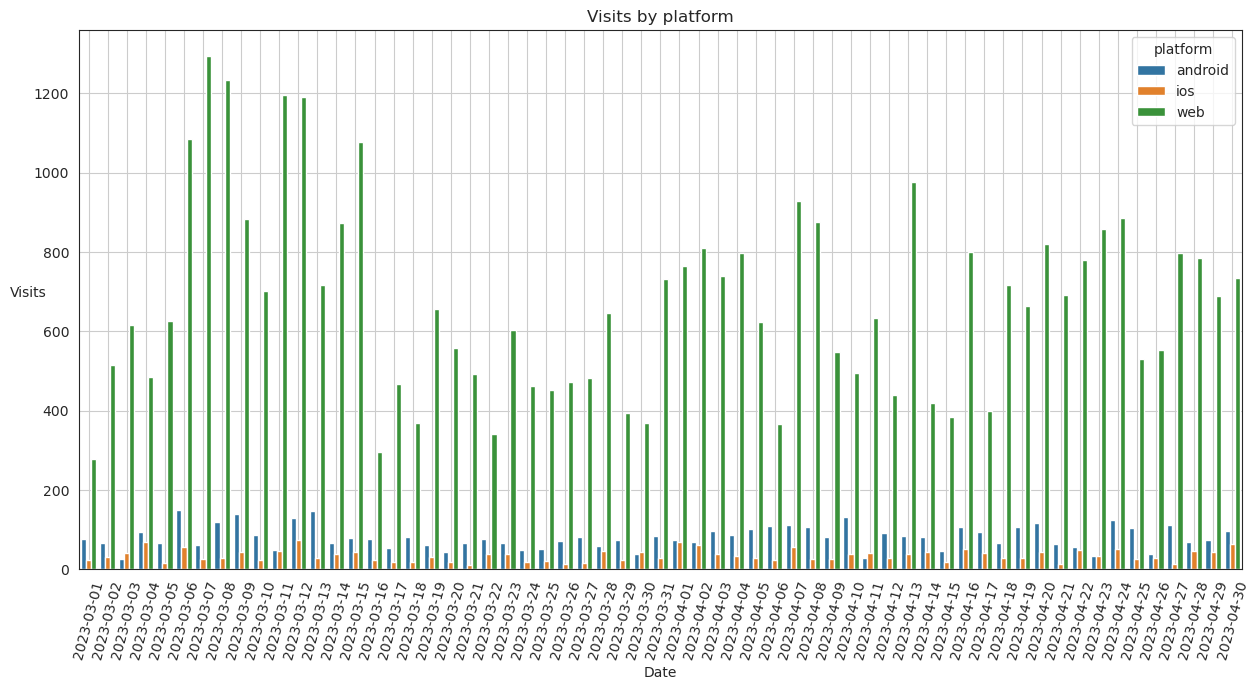

In [170]:
plt.figure(figsize=(15, 7))
sns.barplot(x="date_group", y="visits", hue="platform", data=filtered_visits_by_platform)
plt.xlabel("Date")
plt.ylabel("Visits", rotation=360)
plt.title("Visits by platform")
plt.xticks(rotation=75)
plt.grid()
plt.savefig('./charts/final_visits_by_platform_chart.png')
plt.show()

## Итоговые регистрации

In [171]:
total_regs = ads.groupby(["date_group"]).agg({"registrations":"sum"}).reset_index()
total_regs["date_group"] = pd.to_datetime(total_regs["date_group"])
filtered_regs = total_regs[total_visits["date_group"] <= date_limit]

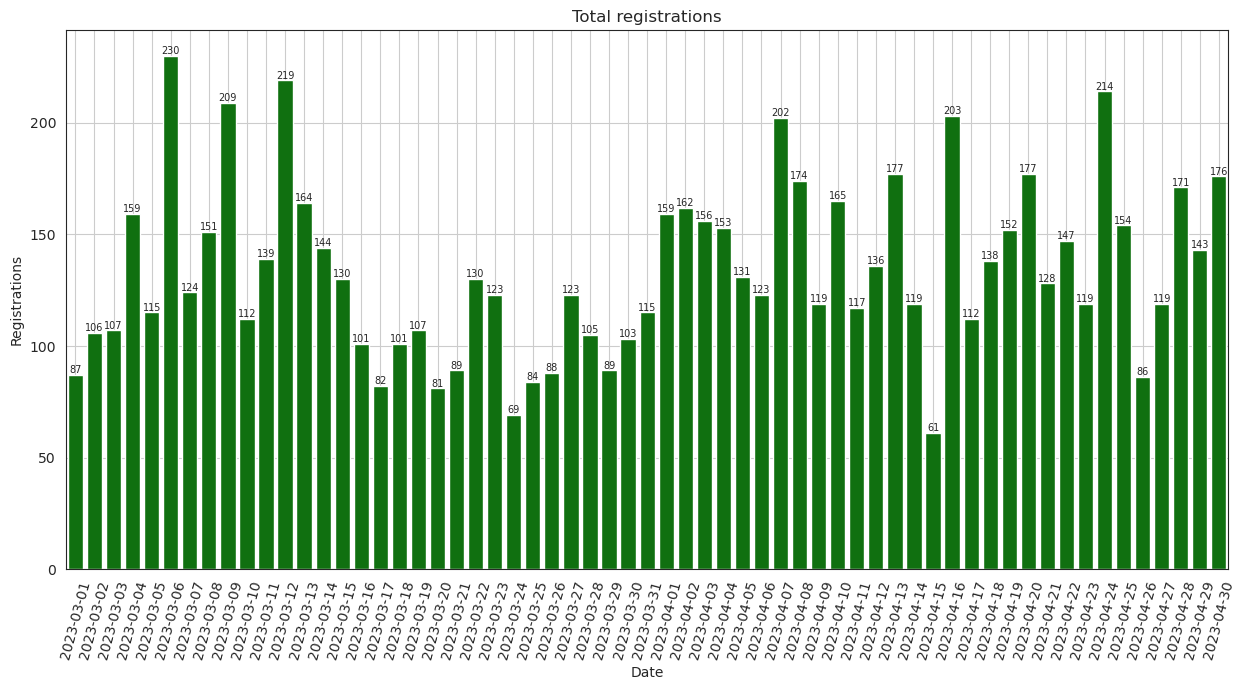

In [175]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x="date_group", y="registrations", data=filtered_regs, color="green")
ax.bar_label(ax.containers[0], fontsize=7)
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Registrations")
plt.title("Total registrations")
plt.grid()
plt.savefig("./charts/final_regs_barplot.png")
plt.show()

## Регистрации по платформам

In [173]:
regs_by_platform = conversion_df.groupby(["date_group", "platform"]).agg({"registrations":"sum"}).reset_index()
regs_by_platform["date_group"] = pd.to_datetime(regs_by_platform["date_group"])
filtered_regs_by_platform = regs_by_platform[regs_by_platform['date_group'] <= date_limit]

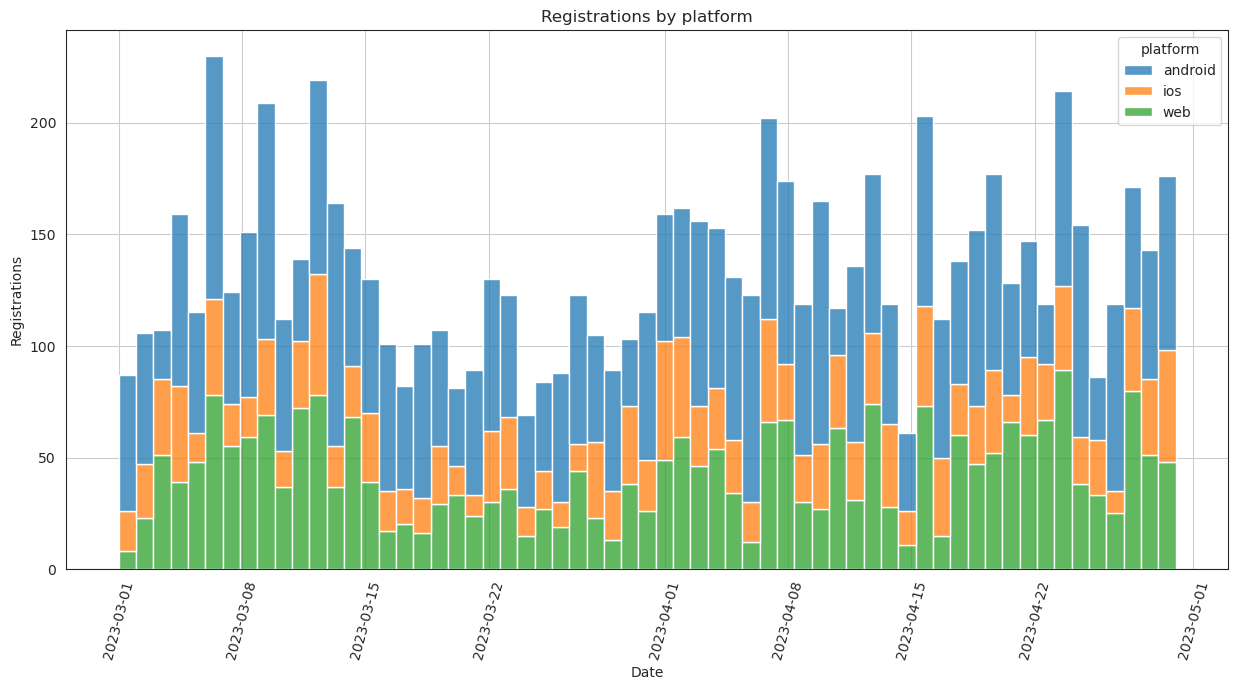

In [174]:
plt.figure(figsize=(15, 7))
sns.histplot(x="date_group", weights="registrations", hue="platform", data=filtered_regs_by_platform, multiple="stack", bins=len(filtered_regs_by_platform["date_group"].unique()))
plt.xlabel("Date")
plt.ylabel("Registrations")
plt.title("Registrations by platform")
plt.xticks(rotation=75)
plt.grid()
plt.savefig('./charts/final_registrations_by_platform_barplot.png')
plt.show()